### Perimeter International Scholars, March 21 - April 8 2016
### Explorations in Condensed Matter Theory
# Many-body entanglement and tensor networks
 



Guifre Vidal, Perimeter Institute

# IJulia I: linear algebra and plotting

In [1]:
using LinearAlgebra

In [2]:
# This is a comment
println("My name is Nanda") # replace xxx with your name and press Shift+Enter

My name is Nanda


You can use the menu arrows $\uparrow$ and $\downarrow$ to move from one cell to another. Try it!

### numbers

In [3]:
a = 1  # integer number

1

In [4]:
b = 2.3 # real number
c = a+b # sum

3.3

In [5]:
z = a + b*im  # complex numbers

1.0 + 2.3im

### vectors

In [6]:
v = [1.1 2.0 0 0.2]  # row vector

1×4 Matrix{Float64}:
 1.1  2.0  0.0  0.2

In [7]:
w = [0.3 0 2 1.2]'  # column vector  

4×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.3
 0.0
 2.0
 1.2

In [8]:
w = rand(4,1) + im*rand(4,1) # random column vector -- try rand(1,4) to create a row vector

4×1 Matrix{ComplexF64}:
 0.15925120752501232 + 0.5817591768339583im
 0.34812166989301474 + 0.5887703466158376im
  0.3047691531893857 + 0.7952684738479531im
  0.4215405525113344 + 0.21149775347707478im

In [9]:
w[2] # access component 2 of the vector w

0.34812166989301474 + 0.5887703466158376im

In [10]:
v*w # scalar product as a 1x1 array

1×1 Matrix{ComplexF64}:
 0.9557277785658099 + 1.8597753384444444im

In [11]:
(v*w)[1] # scalar product as a single number

0.9557277785658099 + 1.8597753384444444im

In [12]:
sqrt((w'*w)[1]) # norm of w

1.3339444607634803 + 0.0im

### matrices

In [13]:
M = w*w' #

4×4 Matrix{ComplexF64}:
 0.363805+0.0im        0.397961+0.108761im   …  0.190172+0.211554im
 0.397961-0.108761im   0.467839+0.0im           0.271271+0.174564im
  0.51119-0.0506548im  0.574327+0.0974111im      0.29667+0.27078im
 0.190172-0.211554im   0.271271-0.174564im      0.222428+0.0im

In [14]:
n=3
M = rand(n,n)  # nxn random matrix 

3×3 Matrix{Float64}:
 0.774695  0.608545  0.626931
 0.973996  0.199437  0.0791532
 0.23469   0.736461  0.746805

In [15]:
M'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.774695  0.973996   0.23469
 0.608545  0.199437   0.736461
 0.626931  0.0791532  0.746805

In [16]:
M = (M+M')/2 # let us make M Hermitian!

3×3 Matrix{Float64}:
 0.774695  0.79127   0.430811
 0.79127   0.199437  0.407807
 0.430811  0.407807  0.746805

### eigenvector decomposition

In [17]:
results = eigen(M) # eigenvalue decomposition
D = results.values
U = results.vectors

3×3 Matrix{Float64}:
  0.54375    -0.488435  -0.682471
 -0.833818   -0.222068  -0.505404
  0.0953021   0.843871  -0.528015

In [18]:
D  # eigenvalues

3-element Vector{Float64}:
 -0.36317768401365536
  0.3901343201231161
  1.693979952333413

In [19]:
U # eigenvectors

3×3 Matrix{Float64}:
  0.54375    -0.488435  -0.682471
 -0.833818   -0.222068  -0.505404
  0.0953021   0.843871  -0.528015

Is it true that $~~~~M = U \cdot D \cdot U^{\dagger}~~?$ 

In [20]:
N = U*diagm(D)*U' # let us build UDU'
display(M) # Are M and
display(N) # N the same?

3×3 Matrix{Float64}:
 0.774695  0.79127   0.430811
 0.79127   0.199437  0.407807
 0.430811  0.407807  0.746805

3×3 Matrix{Float64}:
 0.774695  0.79127   0.430811
 0.79127   0.199437  0.407807
 0.430811  0.407807  0.746805

In [21]:
display(M-N) # yes, up to numerical precision
println("The norm of M-N is ", norm(M-N))

3×3 Matrix{Float64}:
  0.0          -1.11022e-16  0.0
 -1.11022e-16   1.94289e-16  3.88578e-16
  1.11022e-16   4.44089e-16  1.11022e-16

The norm of M-N is 6.597425008528065e-16


In [22]:
evalue1 = D[1] # first eigenvalue of matrix M
evector1 = U[:,1] # first eigenvector of matrix M

3-element Vector{Float64}:
  0.5437503227468934
 -0.8338183822226606
  0.09530210900202706

Is it true that $~~~~M\cdot\vec{v}_1 = \lambda_1 \vec{v}_1 ~~~~?$ 

In [23]:
display(M*evector1) # 
display(evalue1*evector1) # 

3-element Vector{Float64}:
 -0.19747798289689422
  0.30282422894363853
 -0.034611599228973444

3-element Vector{Float64}:
 -0.19747798289689436
  0.30282422894363875
 -0.03461159922897312

### Kronecker product $~~~~A \otimes B = \left[ \begin{array}{cc} 
a_{11} B & a_{12}B &\cdots& a_{1n} B \\ 
a_{21} B & a_{22}B &\cdots& a_{2n} B \\
\vdots & \vdots & \cdots & \vdots \\
a_{n1} B & a_{n2}B &\cdots& a_{nn} B
\end{array} \right]$

In [24]:
Y = [1 0; 0 1]

2×2 Matrix{Int64}:
 1  0
 0  1

In [25]:
X = [0 1; 1 0]

2×2 Matrix{Int64}:
 0  1
 1  0

In [26]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

Example: $$\left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right] \otimes \left[ \begin{array}{cc} a & b \\ c & d \end{array} \right] = \left[ \begin{array}{cc} a & b & 0 & 0 \\ c & d & 0 & 0 \\ 0 & 0 & a & b \\ 0 & 0 & c & d \end{array} \right]$$

In [27]:
kron(Y,A)

4×4 Matrix{Int64}:
 1  2  0  0
 3  4  0  0
 0  0  1  2
 0  0  3  4

In [28]:
kron(X,A)

4×4 Matrix{Int64}:
 0  0  1  2
 0  0  3  4
 1  2  0  0
 3  4  0  0

In [29]:
kron(A, Y)

4×4 Matrix{Int64}:
 1  0  2  0
 0  1  0  2
 3  0  4  0
 0  3  0  4

In [30]:
kron(A,A)

4×4 Matrix{Int64}:
 1   2   2   4
 3   4   6   8
 3   6   4   8
 9  12  12  16

### quantum Ising model on N=3 spins
$$H = \sigma^x_1 \otimes \sigma^x_2 + \sigma^x_2 \otimes \sigma^x_3 +  \sigma^x_3 \otimes \sigma^x_1 
+ h\left( \sigma^z_1 + \sigma^z_2 + \sigma^z_3\right) $$

In [37]:
X = [0. 1; 1 0]
Z = [1. 0; 0 -1]
XX = kron(X,X)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

In [38]:
HXX = kron(XX,I(2)) + kron(I(2), XX) + kron(X,kron(I(2),X))

8×8 Matrix{Float64}:
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0

In [40]:
HZ = kron(Z,I(4)) + kron(I(2),kron(Z,I(2))) + kron(I(4),Z)

8×8 Matrix{Float64}:
 3.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0
 0.0  1.0  0.0   0.0  0.0   0.0   0.0   0.0
 0.0  0.0  1.0   0.0  0.0   0.0   0.0   0.0
 0.0  0.0  0.0  -1.0  0.0   0.0   0.0   0.0
 0.0  0.0  0.0   0.0  1.0   0.0   0.0   0.0
 0.0  0.0  0.0   0.0  0.0  -1.0   0.0   0.0
 0.0  0.0  0.0   0.0  0.0   0.0  -1.0   0.0
 0.0  0.0  0.0   0.0  0.0   0.0   0.0  -3.0

In [42]:
H = HXX + HZ
results = eigen(H)
D = results.values
U = results.vectors

8×8 Matrix{Float64}:
  0.0        2.22045e-16   9.4369e-16   …   0.0        0.866025
 -0.149429  -2.59052e-16   1.11022e-16     -0.557678   8.32667e-17
 -0.149429   1.85037e-16   1.11022e-16     -0.557678   8.32667e-17
  0.0       -0.707107     -0.408248         0.0        0.288675
 -0.149429   7.40149e-17   0.0             -0.557678  -2.77556e-17
  0.0        0.707107     -0.408248     …   0.0        0.288675
  0.0       -1.60247e-16   0.816497         0.0        0.288675
  0.965926   0.0           0.0             -0.258819   0.0

In [43]:
H_max = 2
L=20
h = collect(0:H_max/(L-1):H_max)

20-element Vector{Float64}:
 0.0
 0.10526315789473684
 0.21052631578947367
 0.3157894736842105
 0.42105263157894735
 0.5263157894736842
 0.631578947368421
 0.7368421052631579
 0.8421052631578947
 0.9473684210526315
 1.0526315789473684
 1.1578947368421053
 1.263157894736842
 1.368421052631579
 1.4736842105263157
 1.5789473684210527
 1.6842105263157894
 1.7894736842105263
 1.894736842105263
 2.0

In [45]:
E0 = zeros(L)
for i=1:L
    H = HXX + h[i]*HZ
    results = eigen(H)
    D = results.values
    U = results.vectors
    E0[i] = D[1]
end
E0

20-element Vector{Float64}:
 -1.0
 -1.2184063052510217
 -1.4509259635571277
 -1.6952956958857457
 -1.9495604525187988
 -2.2120738572995915
 -2.4814708148801823
 -2.756629113217059
 -3.036629664314419
 -3.320720075570955
 -3.6082833166430546
 -3.898811714508805
 -4.191885811899258
 -4.487157378213433
 -4.784335837777522
 -5.083177451649396
 -5.383476691694668
 -5.68505934915093
 -5.987777011959127
 -6.291502622129173

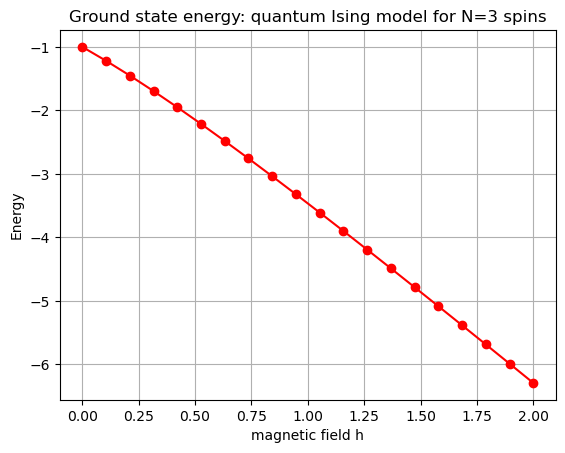

PyObject Text(24.000000000000007, 0.5, 'Energy')

In [46]:
#Pkg.add("PyPlot")
using PyPlot
plot(h,E0, marker="o", color = "r")
grid("on")
title("Ground state energy: quantum Ising model for N=3 spins")
xlabel("magnetic field h")
ylabel("Energy")